Heart Disease Prediction Project
--------------------------------
Problem Statement:
The goal of this project is to build a machine learning system that predicts whether a patient has heart disease based on medical attributes (age, cholesterol, blood pressure, chest pain type, etc.). This is a binary classification problem where the target variable is `target` (0 = No Heart Disease, 1 = Heart Disease).


Approach:
We will explore multiple models:
1. Logistic Regression - a linear baseline classifier.
2. Random Forest - an ensemble of decision trees, good for handling tabular data.
3. XGBoost - a gradient boosting algorithm, often state-of-the-art on structured data.
4. Support Vector Machine (SVM) - effective in high-dimensional spaces and for complex decision boundaries.


The project includes:
- Data preprocessing (handling missing values, scaling, encoding categorical variables).
- Exploratory data checks.
- Model training and evaluation.
- Hyperparameter tuning for Random Forest, XGBoost, and SVM.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [17]:
# ====================
# 1. Load Data
# ====================


data = pd.read_csv("dataset.csv")


print("First 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

First 5 rows:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  

Dataset Info:
<class 'pandas.core.frame.Da

In [18]:
# ====================
# 2. Define Features & Target
# ====================


# Target column is 'target'
X = data.drop("target", axis=1)
y = data["target"]


# Define feature groups
categorical_features = ["chest pain type", "resting ecg", "ST slope"]
binary_features = ["sex", "fasting blood sugar", "exercise angina"]
numeric_features = ["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]

In [ ]:
# ====================
# 3. Preprocessing
# ====================


# Numeric pipeline: handle missing values, scale
numeric_transformer = Pipeline(steps=[
("imputer", SimpleImputer(strategy="median")),
("scaler", StandardScaler())
])


# Categorical pipeline: handle missing, one-hot encode
categorical_transformer = Pipeline(steps=[
("imputer", SimpleImputer(strategy="most_frequent")),
("encoder", OneHotEncoder(handle_unknown="ignore"))
])


# Binary pipeline: impute if needed (no encoding necessary)
binary_transformer = Pipeline(steps=[
("imputer", SimpleImputer(strategy="most_frequent"))
])


# Combine into a single preprocessing pipeline
preprocessor = ColumnTransformer(
transformers=[
("num", numeric_transformer, numeric_features),
("cat", categorical_transformer, categorical_features),
("bin", binary_transformer, binary_features)
]
)

In [19]:
# ====================
# 4. Train-Test Split
# ====================


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# ====================
# 5. Models Setup
# ====================


models = {
"Logistic Regression": LogisticRegression(max_iter=1000),
"Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
"SVM": SVC(kernel='rbf', probability=True, random_state=42)
}


===== Logistic Regression =====
Accuracy: 0.8613
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       112
           1       0.85      0.89      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



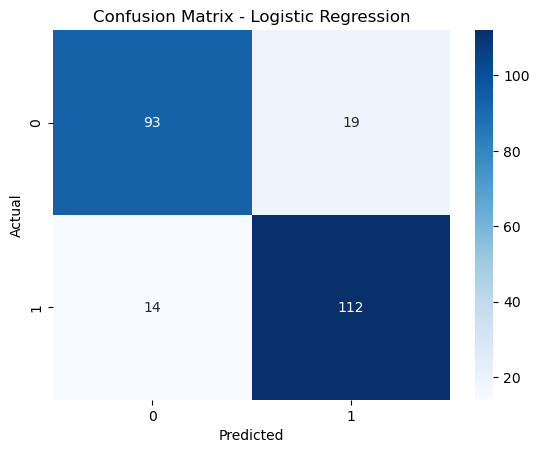


===== Random Forest =====
Accuracy: 0.9244
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       112
           1       0.94      0.92      0.93       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



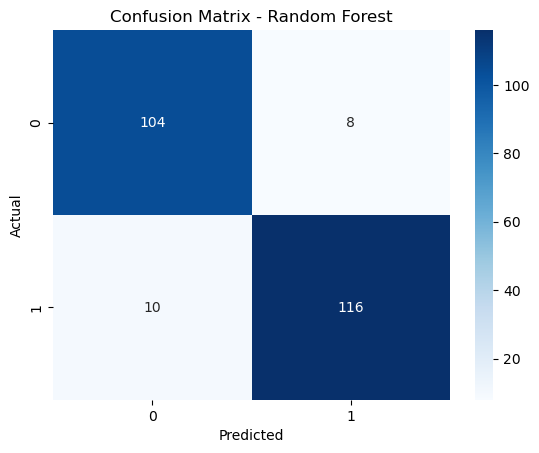


===== XGBoost =====
Accuracy: 0.9160
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       112
           1       0.92      0.92      0.92       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



c:\Users\klair\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:23:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


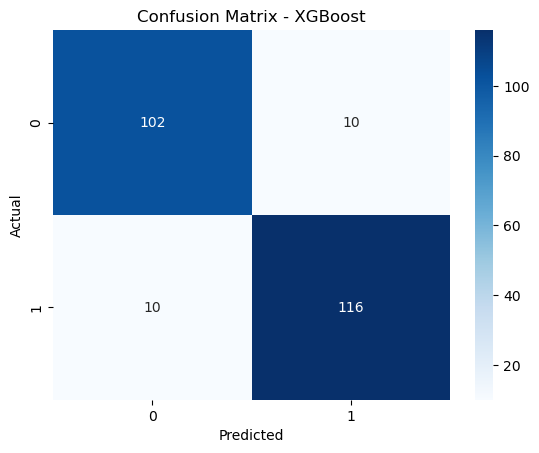


===== SVM =====
Accuracy: 0.8782
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       112
           1       0.88      0.90      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



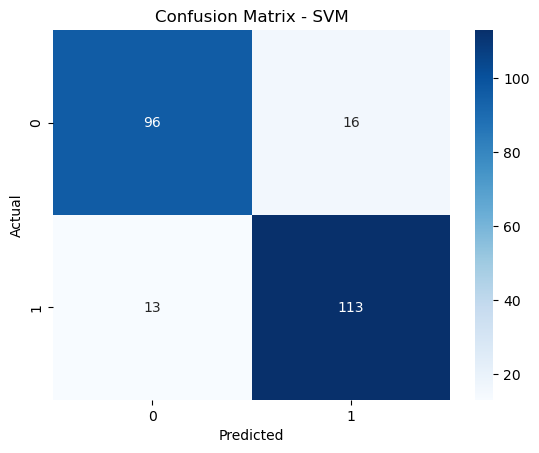

In [22]:
# ====================
# 6. Model Training & Evaluation
# ====================

results = {}

for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Create pipeline with preprocessing + model
    clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    
    # Fit model
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [25]:
# ====================
# 7. Model Comparison
# ====================

print("\n===== Model Comparison (Accuracy) =====")
for model, score in results.items():
    print(f"{model}: {score:.4f}")



===== Model Comparison (Accuracy) =====
Logistic Regression: 0.8613
Random Forest: 0.9244
XGBoost: 0.9160
SVM: 0.8782
